In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [5]:
nx = 81
ny = 81
nt = 100
c = 1
dx = 2.0 / (nx - 1)
dy = 2.0 / (ny - 1)
sigma = 0.2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

u = np.ones((ny, nx))
un = np.ones((ny, nx))


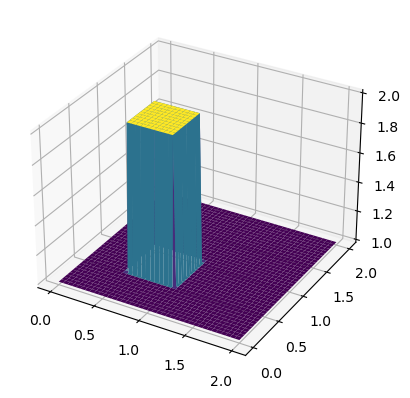

In [7]:
# Initial Conditions

u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


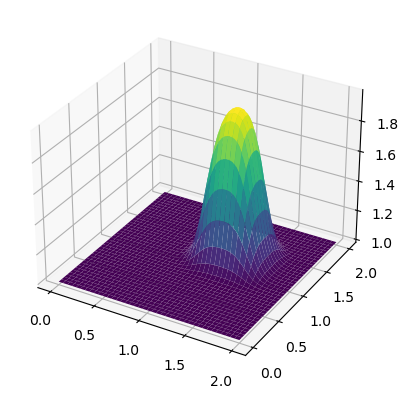

In [8]:
# Iterations in two dimensions

u = np.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): 
    un = u.copy()
    row, col = u.shape
    for j in range(1,row):
        for i in range(1,col):
            u[j,i] = (un[j,i] - (c * dt / dx * (un[j,i] - un[j,i-1])) - (c * dt / dy * (un[j,i] - un[j-1,i])))
            u[0,:] = 1
            u[-1,:] = 1
            u[:,0] = 1
            u[:,-1] = 1

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

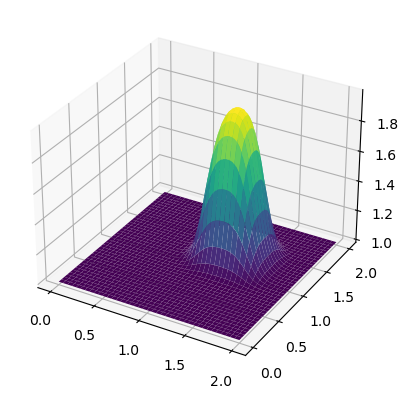

In [9]:
#Get rid of loops in space

u = np.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (c * dt / dx * (un[1:,1:] - un[1:,:-1])) - (c * dt / dy * (un[1:,1:] - un[:-1,1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf3 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)


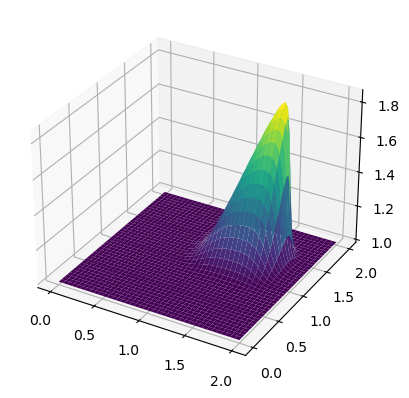

In [10]:
#Get rid of loops in space

u = np.ones((ny, nx))
u[int(0.5 / dy):int(1 / dy + 1), int(0.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1):
    un = u.copy()
    u[1:,1:] = (un[1:,1:] - (un[1:,1:] * dt / dx * (un[1:,1:] - un[1:,:-1])) - (un[1:,1:] * dt / dy * (un[1:,1:] - un[:-1,1:])))
    u[0,:] = 1
    u[-1,:] = 1
    u[:,0] = 1
    u[:,-1] = 1

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
surf3 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)